In [ ]:
#LOAD DATA/ "Done dataset discovery"

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/FloryBana/data/df_final_demo.txt")
df_final_experiment_clients = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/FloryBana/data/df_final_experiment_clients.txt")
df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/FloryBana/data/df_final_web_data_pt_1.txt")
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/FloryBana/data/df_final_web_data_pt_2.txt")
df_final_web_data = pd.concat([df2, df1], ignore_index=True)

print('Df')
display(df.head())
print(df.shape)

print('Df1')
display(df1.head())
print(df1.shape)

print('Df2')
display(df2.head())
print(df2.shape)

print('df_final_experiment_clients')
display(df_final_experiment_clients.head())
print(df_final_experiment_clients.shape)

print ('df_final_web_data')
display(df_final_web_data.head())
print(df_final_web_data.shape)

Df


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


(70609, 9)
Df1


,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


(343141, 5)
Df2


,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58


(412264, 5)
df_final_experiment_clients


,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


(70609, 2)
df_final_web_data


,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58


(755405, 5)


In [ ]:
#BEGINING CLEANNING DATA 1 "Carried out data cleaning and fix any problems if there are any."

In [ ]:
# Drop duplicates and empty rows
df_final_web_data.drop_duplicates(inplace=True)
df_final_web_data.dropna(inplace=True)
df_final_experiment_clients.drop_duplicates(inplace=True)
df_final_experiment_clients.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

print(df_final_web_data.shape)
print(df_final_web_data.isnull().sum())
print(df_final_experiment_clients.shape)
print(df_final_experiment_clients.isnull().sum())
print(df.shape)
print(df.isnull().sum())

(744641, 5)
client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64
(50500, 2)
client_id    0
Variation    0
dtype: int64
(70594, 9)
client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
dtype: int64


In [ ]:
# DE QUELLE MANIERE ON MERGE ????
df_web_data_merged = pd.merge(df_final_web_data, df_final_experiment_clients, how='outer', on='client_id')

df_web_data_merged.drop_duplicates(inplace=True)
df_web_data_merged.dropna(inplace=True)
display(df_web_data_merged.head())
display(df_web_data_merged.shape)

display(df_web_data_merged.isnull().sum())


,client_id,visitor_id,visit_id,process_step,date_time,Variation
11,4726500,934350987_45569789638,467318052_88159801968_565608,confirm,2017-06-05 17:38:52,Test
12,4726500,934350987_45569789638,467318052_88159801968_565608,step_3,2017-06-05 17:38:33,Test
13,4726500,934350987_45569789638,467318052_88159801968_565608,step_2,2017-06-05 17:37:31,Test
14,4726500,934350987_45569789638,467318052_88159801968_565608,step_1,2017-06-05 17:37:24,Test
15,4726500,934350987_45569789638,467318052_88159801968_565608,start,2017-06-05 17:37:16,Test


(317235, 6)

,0
client_id,0
visitor_id,0
visit_id,0
process_step,0
date_time,0
Variation,0


In [ ]:
# pour les lignes où "variation" est vide, on ajoute "test"
# df_web_data_merged['Variation'] = df_web_data_merged['Variation'].fillna('Test')

In [ ]:
# analysis on split Test/Control
print(df_web_data_merged['Variation'].value_counts())

# Définir l'ordre des process_step
order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
df_web_data_merged['process_step'] = pd.Categorical(df_web_data_merged['process_step'], categories=order, ordered=True)
df_web_data_merged.groupby(['process_step', 'Variation']).size().reset_index(name='count')

Variation
Test       176699
Control    140536
Name: count, dtype: int64


<ipython-input-10-d01c86103dcb>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_web_data_merged.groupby(['process_step', 'Variation']).size().reset_index(name='count')


,process_step,Variation,count
0,start,Control,45380
1,start,Test,55773
2,step_1,Control,29544
3,step_1,Test,38666
4,step_2,Control,25773
5,step_2,Test,30899
6,step_3,Control,22503
7,step_3,Test,25761
8,confirm,Control,17336
9,confirm,Test,25600


In [ ]:
# END CLEANING DATA 1 => FIRST RESULT / "Carried out data cleaning and fix any problems if there are any."

In [ ]:
# BEGINING CLEANING 2 => REORGANISATION /"Carried out data cleaning and fix any problems if there are any."

In [ ]:
# on ajoute la database "df" sur "df_web_data_merged" pour ajouter les infos clients

df_final_customers = pd.merge(df_web_data_merged, df, how='inner', on='client_id')

print(df_final_customers.isnull().sum())
print(df_final_customers.head())

df_final_customers.drop_duplicates(inplace=True)

print(df_final_customers.shape)
print(df_web_data_merged.shape)
print(df.shape)

client_id           0
visitor_id          0
visit_id            0
process_step        0
date_time           0
Variation           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
dtype: int64
   client_id             visitor_id                      visit_id  \
0    4726500  934350987_45569789638  467318052_88159801968_565608   
1    4726500  934350987_45569789638  467318052_88159801968_565608   
2    4726500  934350987_45569789638  467318052_88159801968_565608   
3    4726500  934350987_45569789638  467318052_88159801968_565608   
4    4726500  934350987_45569789638  467318052_88159801968_565608   

  process_step            date_time Variation  clnt_tenure_yr  \
0      confirm  2017-06-05 17:38:52      Test            14.0   
1       step_3  2017-06-05 17:38:33      Test            14.0   
2       step_2  2017-06-05 17:37:31      Test            14.0   
3   

In [ ]:
counts = df_final_customers.groupby(['process_step', 'Variation']).size().reset_index(name='count')

# Calculate the total counts for each 'Variation'
total_counts = df_final_customers.groupby('Variation')['process_step'].count().reset_index(name='total')
merged_counts = pd.merge(counts, total_counts, on='Variation')

# Calculate the percentages
merged_counts['percentage'] = (merged_counts['count'] / merged_counts['total']) * 100
merged_counts

<ipython-input-14-61bef90c1dde>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df_final_customers.groupby(['process_step', 'Variation']).size().reset_index(name='count')


,process_step,Variation,count,total,percentage
0,start,Control,45361,140482,32.289546
1,step_1,Control,29533,140482,21.022622
2,step_2,Control,25764,140482,18.339716
3,step_3,Control,22495,140482,16.012728
4,confirm,Control,17329,140482,12.335388
5,start,Test,55753,176641,31.562887
6,step_1,Test,38651,176641,21.881103
7,step_2,Test,30888,176641,17.486314
8,step_3,Test,25755,176641,14.580420
9,confirm,Test,25594,176641,14.489275



Pivot Table with Percentages:
process_step      start     step_1     step_2     step_3    confirm
Variation                                                          
Control       32.289546  21.022622  18.339716  16.012728  12.335388
Test          31.562887  21.881103  17.486314  14.580420  14.489275


<ipython-input-15-a39751cb8403>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts_by_step_variation = df_final_customers.groupby(['process_step', 'Variation']).size().reset_index(name='count')


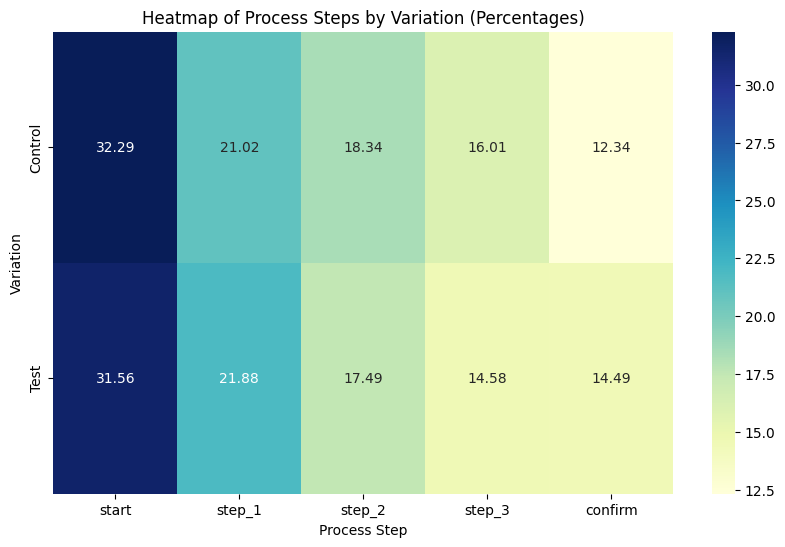

In [ ]:
# Completion Rate: The proportion of users who reach the final ‘confirm’ step.

# Calculate counts for each combination of 'process_step' and 'Variation'
counts_by_step_variation = df_final_customers.groupby(['process_step', 'Variation']).size().reset_index(name='count')

# Calculate the total counts for each 'Variation'
total_counts = counts_by_step_variation.groupby('Variation')['count'].sum().reset_index(name='total')

# Merge the counts with the total counts
merged_counts = counts_by_step_variation.merge(total_counts, on='Variation')

# Calculate the percentages
merged_counts['percentage'] = (merged_counts['count'] / merged_counts['total']) * 100
merged_counts

# Pivot the DataFrame to create a table for the heatmap
pivot_table = merged_counts.pivot(index='Variation', columns='process_step', values='percentage')

# Print the pivoted table
print("\nPivot Table with Percentages:")
print(pivot_table)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True)

# Customize the plot
plt.title('Heatmap of Process Steps by Variation (Percentages)')
plt.xlabel('Process Step')
plt.ylabel('Variation')

# Show the plot
plt.show()

In [ ]:
# ANALYSIS

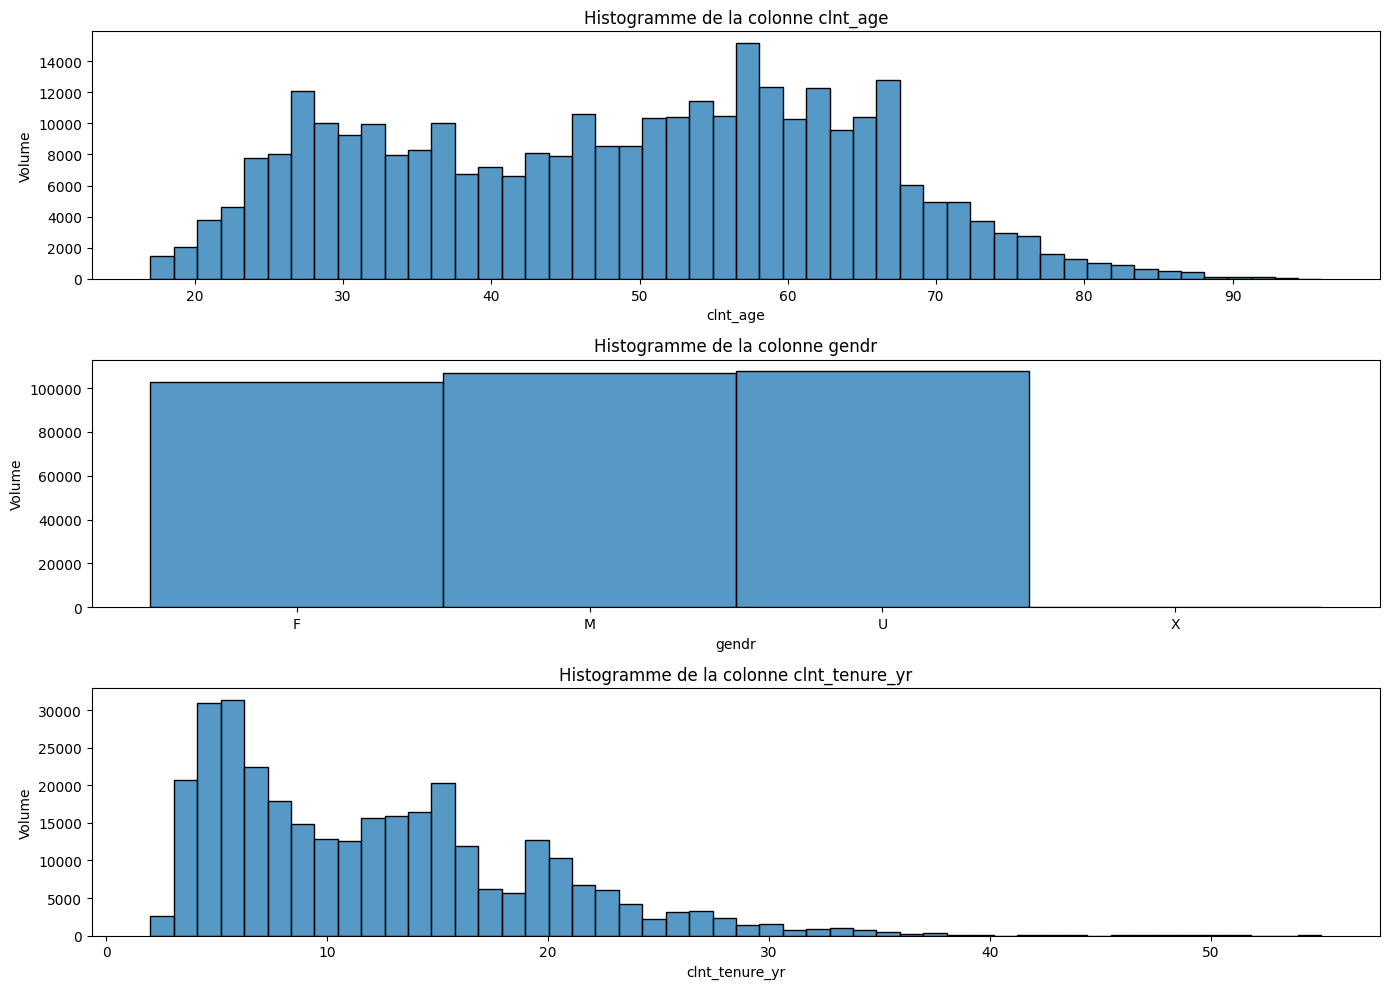

In [ ]:
# Client behavior analysis
# Définir les colonnes à inclure dans la boucle
columns_to_plot = ['clnt_age', 'gendr', 'clnt_tenure_yr']  # Liste des colonnes spécifiques

num_cols = len(columns_to_plot)
fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(14, 10))

# Itérer sur les colonnes du DataFrame et créer un histogramme pour chaque colonne
for i, col in enumerate(columns_to_plot):
    sns.histplot(df_final_customers[col], bins=50, kde=False, ax=axes[i])
    axes[i].set_title(f'Histogramme de la colonne {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Volume')

# Ajuster l'espacement
plt.tight_layout()
plt.show()

In [ ]:
#CONCLUSIONS : Carried out a client behaviour analysis to answer any additional relevant questions you think are important.

In [ ]:
# NEED TO WRITE WHAT WE CONCLUDE/ Answered the following questions about demographics:
#Who are the primary clients using this online process?
#Are the primary clients younger or older, new or long-standing?

In [ ]:
#DAY 3/ Use at least completion rate, time spent on each step and error rates. Add any KPIs you might find relevant.

In [ ]:
# Time Spent on Each Step
df_final_customers['date_time'] = pd.to_datetime(df_final_customers['date_time'])

# Sort DataFrame by visit_id, client_id, and date_time
df_final_customers = df_final_customers.sort_values(by=['visit_id', 'client_id', 'date_time'])
print("\nSorted DataFrame:")

# Calculate time differences
df_final_customers['time_diff'] = df_final_customers.groupby(['visit_id', 'client_id'])['date_time'].diff().shift(-1)
print("\nDataFrame with Time Differences:")
print(df_final_customers)

# Group by process_step and summarize time spent
time_spent = df_final_customers.groupby('process_step')['time_diff'].mean().reset_index()

# Convert time_diff to seconds and format to minutes and seconds
time_spent['time_diff_sec'] = time_spent['time_diff'].dt.total_seconds()
time_spent['avg_formatted_time'] = time_spent['time_diff_sec'].apply(lambda x: f"{int(x // 60)}m {int(x % 60)}s")

print("\nTime Spent on Each Step:")
time_spent = time_spent[['process_step', 'avg_formatted_time']]
time_spent


Sorted DataFrame:

DataFrame with Time Differences:
        client_id             visitor_id                      visit_id  \
194157    3561384   451664975_1722933822  100012776_37918976071_457913   
194156    3561384   451664975_1722933822  100012776_37918976071_457913   
95048     7338123  612065484_94198474375   100019538_17884295066_43909   
95047     7338123  612065484_94198474375   100019538_17884295066_43909   
95046     7338123  612065484_94198474375   100019538_17884295066_43909   
...           ...                    ...                           ...   
38809     6627522  730634087_44272418812  999988789_76411676596_272843   
38808     6627522  730634087_44272418812  999988789_76411676596_272843   
38807     6627522  730634087_44272418812  999988789_76411676596_272843   
38806     6627522  730634087_44272418812  999988789_76411676596_272843   
38805     6627522  730634087_44272418812  999988789_76411676596_272843   

       process_step           date_time Variation  clnt_te

<ipython-input-21-4f0e8c5c44ac>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_spent = df_final_customers.groupby('process_step')['time_diff'].mean().reset_index()


,process_step,avg_formatted_time
0,start,1m 3s
1,step_1,0m 56s
2,step_2,1m 30s
3,step_3,2m 13s
4,confirm,3m 39s


In [ ]:
# Step 1: Convert 'date_time' to datetime (if not done yet)
df_final_customers['date_time'] = pd.to_datetime(df_final_customers['date_time'])

# Step 2: Sort DataFrame by visit_id, client_id, and date_time (as in the original code)
df_sorted = df_final_customers.sort_values(by=['visit_id', 'client_id', 'date_time'])

# Step 3: Calculate time differences for each client
df_sorted['time_diff'] = df_sorted.groupby(['visit_id', 'client_id'])['date_time'].diff().shift(-1)

# Step 4: Calculate average time spent for Test and Control groups separately
# For Test group
time_spent_test = df_sorted[df_sorted['Variation'] == 'Test'].groupby('process_step')['time_diff'].mean().reset_index()

# Convert time_diff to seconds and format to minutes and seconds
time_spent_test['time_diff_sec'] = time_spent_test['time_diff'].dt.total_seconds()
time_spent_test['avg_formatted_time'] = time_spent_test['time_diff_sec'].apply(lambda x: f"{int(x // 60)}m {int(x % 60)}s")

# For Control group
time_spent_control = df_sorted[df_sorted['Variation'] == 'Control'].groupby('process_step')['time_diff'].mean().reset_index()

# Convert time_diff to seconds and format to minutes and seconds
time_spent_control['time_diff_sec'] = time_spent_control['time_diff'].dt.total_seconds()
time_spent_control['avg_formatted_time'] = time_spent_control['time_diff_sec'].apply(lambda x: f"{int(x // 60)}m {int(x % 60)}s")

# Step 5: Display the results
print("\nTime Spent on Each Step for Test Group :")
print(time_spent_test[['process_step', 'avg_formatted_time']])

print("\nTime Spent on Each Step for Control Group :")
print(time_spent_control[['process_step', 'avg_formatted_time']])

print("\n Total Seconds Spent for Test Group :")
print(time_spent_test['time_diff_sec'].mean())
print("\n Total Seconds Spent for Control Group :")
print(time_spent_control['time_diff_sec'].mean())


Time Spent on Each Step for Test Group :
  process_step avg_formatted_time
0        start              1m 1s
1       step_1              1m 0s
2       step_2             1m 28s
3       step_3              2m 9s
4      confirm              4m 3s

Time Spent on Each Step for Control Group :
  process_step avg_formatted_time
0        start              1m 6s
1       step_1             0m 50s
2       step_2             1m 32s
3       step_3             2m 17s
4      confirm             2m 48s

 Total Seconds Spent for Test Group :
116.8709895584

 Total Seconds Spent for Control Group :
103.04211634020001


<ipython-input-42-f3e497ebb5bc>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_spent_test = df_sorted[df_sorted['Variation'] == 'Test'].groupby('process_step')['time_diff'].mean().reset_index()
<ipython-input-42-f3e497ebb5bc>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_spent_control = df_sorted[df_sorted['Variation'] == 'Control'].groupby('process_step')['time_diff'].mean().reset_index()


In [ ]:
# Too ineficient
# create test group set
#test_group = []

# create control group set
#control_group = []

# Iterate over the DataFrame
# for index, row in df_final_customers.iterrows():
#   if row['Variation'] == 'Test':
#      test_group.append(row)
# else:
#    control_group.append(row)

# test_group = pd.DataFrame(test_group)

# test_group.head()


# Create separate DataFrames for test and control groups using boolean indexing
test_group_df = df_final_customers[df_final_customers['Variation'] == 'Test']
control_group_df = df_final_customers[df_final_customers['Variation'] == 'Control']

In [ ]:
# ERROR RATES
# Create a dictionary to set the order of steps
step_order = {"start": 1, "step_1": 2, "step_2": 3, "step_3": 4, "confirm": 5}
df_final_customers['step_order'] = df_final_customers['process_step'].map(step_order)

# Calculate if a step is moving backwards
df_final_customers['step_order_numeric'] = df_final_customers['step_order'].astype('int')
df_final_customers['backward_step'] = df_final_customers.groupby(['visit_id', 'client_id'])['step_order_numeric'].diff().lt(0)

# Compter le nombre de reculs par process_step
errors_by_step = df_final_customers[df_final_customers['backward_step']].groupby('process_step').size().reset_index(name='error_count')

# Compter le total d'occurrences de chaque process_step
total_by_step = df_final_customers.groupby('process_step').size().reset_index(name='total_count')

# Fusionner les erreurs et les totaux
merged_steps = pd.merge(errors_by_step, total_by_step, on='process_step')

# Calculer le nombre moyen d'erreurs par process_step
merged_steps['error_rate'] = (merged_steps['error_count'] / merged_steps['total_count']) * 100

# Merge the counts
#merged_counts = pd.merge(error_counts, total_steps, on=['visit_id', 'client_id'])

# Calculate the error rates
print("\nError Rates:")
print(merged_steps)
print(df_final_customers)

In [ ]:
# ERROR RATES FOR TEST & CONTROL GROUP

def calculate_error_rates(df_final_customers):
    # Create a dictionary to set the order of steps
    step_order = {"start": 1, "step_1": 2, "step_2": 3, "step_3": 4, "confirm": 5}
    df_final_customers['step_order'] = df_final_customers['process_step'].map(step_order)

    # Calculate if a step is moving backwards
    df_final_customers['step_order_numeric'] = df_final_customers['step_order'].astype('int')
    df_final_customers['backward_step'] = df_final_customers.groupby(['visit_id', 'client_id'])['step_order_numeric'].diff().lt(0)

    # Count the number of reculs by process_step
    errors_by_step = df_final_customers[df_final_customers['backward_step']].groupby('process_step').size().reset_index(name='error_count')

    # Count the total occurrences of each process_step
    total_by_step = df_final_customers.groupby('process_step').size().reset_index(name='total_count')

    # Merge the errors and totals
    merged_steps = pd.merge(errors_by_step, total_by_step, on='process_step')

    # Calculate the average number of errors per process_step
    merged_steps['error_rate'] = (merged_steps['error_count'] / merged_steps['total_count']) * 100

    return merged_steps

# Assuming test_group_df and control_group_df are already defined
# Calculate error rates for both groups
test_error_rates = calculate_error_rates(test_group_df)
control_error_rates = calculate_error_rates(control_group_df)

# Display the results
print("\nError Rates for Test group :")
print(test_error_rates)

print("\nError Rates for Control group :")
print(control_error_rates)


In [ ]:
columns_to_plot = ['clnt_age', 'gendr', 'clnt_tenure_yr']  # Liste des colonnes spécifiques

num_cols = len(columns_to_plot)
fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(14, 10))

# Itérer sur les colonnes du DataFrame et créer un histogramme pour chaque colonne
for i, col in enumerate(columns_to_plot):
    sns.histplot(test_group_df[col], bins=50, kde=False, ax=axes[i])
    axes[i].set_title(f'Histogramme de la colonne {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Volume')

# Ajuster l'espacement
plt.tight_layout()
plt.show()

In [ ]:
columns_to_plot = ['clnt_age', 'gendr', 'clnt_tenure_yr']  # Liste des colonnes spécifiques

num_cols = len(columns_to_plot)
fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(14, 10))

# Itérer sur les colonnes du DataFrame et créer un histogramme pour chaque colonne
for i, col in enumerate(columns_to_plot):
    sns.histplot(control_group_df[col], bins=50, kde=False, ax=axes[i])
    axes[i].set_title(f'Histogramme de la colonne {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Volume')

# Ajuster l'espacement
plt.tight_layout()
plt.show()

In [ ]:
# Discretizing 'Age' into 4 categories
bins = [0, 20, 40, 60, df_final_customers['clnt_age'].max()]
labels = ['<20', '20-49', '50-60', '60+']

df_final_customers['clnt_age']
df_final_customers['clnt_age'] = pd.cut(df_final_customers['clnt_age'], bins=bins, labels=labels, include_lowest=True)



In [ ]:
# Check the age groups and their counts
print("\nAge Groups and Their Counts:")
print(df_final_customers['clnt_age'].value_counts())

# Check the delegation counts by age group and variation
delegation_by_age_variation = df_final_customers.groupby(['clnt_age', 'Variation'])['client_id'].count().reset_index(name='count')
print("\nDelegation Counts by Age Group and Variation:")
print(delegation_by_age_variation)

display(test_group_df.shape)
display(control_group_df.shape)
display(df_final_customers['clnt_age'].head())
display(df_final_customers['process_step'].head())

# Calculate counts for each combination of 'clnt_age' and 'Variation'
counts_by_age_range = df_final_customers.groupby(['clnt_age', 'Variation']).size().reset_index(name='count')

# Calculate the total counts for each 'Variation'
total_counts = counts_by_age_range.groupby('Variation')['count'].sum().reset_index(name='total')

# Merge the counts with the total counts
merged_counts = counts_by_age_range.merge(total_counts, on='Variation')

# Calculate the percentages
merged_counts['percentage'] = (merged_counts['count'] / merged_counts['total']) * 100
merged_counts

# Pivot the DataFrame to create a table for the heatmap
pivot_table = merged_counts.pivot(index='Variation', columns='clnt_age', values='percentage')

# Print the pivoted table
print("\nPivot Table with Percentages:")
print(pivot_table)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True)

# Customize the plot
plt.title('Heatmap of Process Steps by Variation (Percentages)')
plt.xlabel('clnt_age')
plt.ylabel('Variation')

# Show the plot
plt.show()

In [ ]:
# Exporter le DataFrame au format CSV
df_final_customers.to_csv('second_project.csv', index=False)


In [ ]:
#Hypothesis Testing!!!!!!

In [ ]:
# Hypothesis testing for control and test for completation rate :
from scipy import stats

# Control group completion data (Confirm step)
control_completed = [1] * 17329  # 1 for completed
control_not_completed = [0] * (140482 - 17329)  # 0 for not completed

# Test group completion data (Confirm step)
test_completed = [1] * 25594  # 1 for completed
test_not_completed = [0] * (176641 - 25594)  # 0 for not completed

# Combine completed and not completed into two groups
control_group = control_completed + control_not_completed
test_group = test_completed + test_not_completed

# Perform the T-test
t_stat, p_value = stats.ttest_ind(control_group, test_group)

# Print the result
print("T-statistic:", t_stat)
print("P-value:", p_value)



In [ ]:
# Graph HP Testing Completation Rate

from scipy import stats

# Data for Completion Rates
process_steps = ['Start', 'Step 1', 'Step 2', 'Step 3', 'Confirm']
completion_rates_test = [31.56, 21.88, 17.49, 14.58, 14.49]
completion_rates_control = [32.29, 21.02, 18.34, 16.01, 12.34]

# Perform the T-test (for the 'Confirm' step as an example)
control_completed = [1] * 17329  # Completed in control group
control_not_completed = [0] * (140482 - 17329)  # Not completed in control group
test_completed = [1] * 25594  # Completed in test group
test_not_completed = [0] * (176641 - 25594)  # Not completed in test group

control_group = control_completed + control_not_completed
test_group = test_completed + test_not_completed

t_stat, p_value = stats.ttest_ind(control_group, test_group)

# Plotting Completion Rates
plt.figure(figsize=(12, 8))
plt.plot(process_steps, completion_rates_test, marker='o', color='blue', label='Test Group')
plt.plot(process_steps, completion_rates_control, marker='o', color='red', label='Control Group')

# Annotating the T-test results
plt.text(4, 15, f"T-statistic: {t_stat:.2f}\nP-value: {p_value:.2e}", fontsize=12, color='black')

# Adding labels and title
plt.xlabel('Process Step')
plt.ylabel('Completion Rate (%)')
plt.title('Completion Rates by Process Step and Variation\nHypothesis Test for Confirm Step')

# Adding legend and grid
plt.legend()
plt.grid(True)

# Show plot
plt.show()



In [ ]:
# T-test Time spending
from scipy.stats import ttest_ind

# Time spent in seconds for each process step for Test and Control groups
time_spent_test = [61, 60, 88, 129, 243]  # Time in seconds (Test group)
time_spent_control = [66, 50, 92, 137, 168]  # Time in seconds (Control group)

# Perform T-test
t_stat, p_value = stats.ttest_ind(time_spent_test, time_spent_control)

# Print the result
print("T-Statistic:", t_stat)
print("P-Value:", p_value)





In [ ]:
# Graph HP testing Time Spend

import matplotlib.pyplot as plt

# Data for Time Spent
steps = ['Start', 'Step 1', 'Step 2', 'Step 3', 'Confirm']
time_spent_test = [61, 60, 88, 129, 243]  # Time in seconds for Test group
time_spent_control = [66, 50, 92, 137, 168]  # Time in seconds for Control group

# Hypothesis Testing Results
t_stat = 0.33520524147947794
p_value = 0.7460908543597136

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(steps, time_spent_test, marker='o', color='blue', label='Test Group')
plt.plot(steps, time_spent_control, marker='o', color='red', label='Control Group')

# Adding labels and title
plt.xlabel('Process Step')
plt.ylabel('Average Time Spent (seconds)')
plt.title('Average Time Spent on Each Process Step by Group')

# Annotate T-Statistic and P-Value
plt.annotate(f'T-Statistic: {t_stat:.2f}\nP-Value: {p_value:.2e}',
             xy=(0.5, 0.1), xycoords='figure fraction',
             fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

# Adding legend and grid
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [ ]:
# Hypothesis testing age group

from scipy.stats import ttest_ind


# Data for Age Groups
data = {
    'Age Group': ['<20', '20-49', '50-60', '60+'],
    'Control': [1573, 46395, 56045, 36469],
    'Test': [1921, 56721, 70074, 47925]
}

df = pd.DataFrame(data)

# Perform T-Test between Control and Test for each age group
t_stat, p_value = ttest_ind(df['Control'], df['Test'])

# Print the results
print("T-Statistic:", t_stat)
print("P-Value:", p_value)



In [ ]:
#Hypothesis Testing Error Rates

from scipy.stats import ttest_ind

# Data for Error Rates
error_rates_test = [18.85, 8.83, 7.39, 0.09, 0.00]
error_rates_control = [10.60, 7.80, 9.18, 0.45, 0.00]

# Perform T-Test
t_stat, p_value = ttest_ind(error_rates_test, error_rates_control)

print("T-Statistic:", t_stat)
print("P-Value:", p_value)


In [ ]:
#Graph The Age Groups and Error Rates

import matplotlib.pyplot as plt


# Data for Age Groups
age_groups = ['<20', '20-49', '50-60', '60+']
control_counts = [1573, 46395, 56045, 36469]
test_counts = [1921, 56721, 70074, 47925]

# Data for Error Rates
steps = ['Start', 'Step 1', 'Step 2', 'Step 3', 'Confirm']
error_rates_control = [10.60, 7.80, 9.18, 0.45, 0.00]
error_rates_test = [18.85, 8.83, 7.39, 0.09, 0.00]

# Hypothesis Testing Results
t_stat_age = -0.47644632366087436
p_value_age = 0.6506111099649343
t_stat_error = 0.3452444475777549
p_value_error = 0.7388126207083883

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot for Age Groups
ax1.plot(age_groups, control_counts, marker='o', color='blue', label='Control')
ax1.plot(age_groups, test_counts, marker='o', color='red', label='Test')
ax1.set_title('Delegation Counts by Age Group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Count')
ax1.legend()
ax1.grid(True)

# Annotate T-Statistic and P-Value for Age Groups
ax1.annotate(f'T-Statistic: {t_stat_age:.2f}\nP-Value: {p_value_age:.2e}',
             xy=(0.5, 0.1), xycoords='axes fraction',
             fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

# Plot for Error Rates
ax2.plot(steps, error_rates_control, marker='o', color='blue', label='Control')
ax2.plot(steps, error_rates_test, marker='o', color='red', label='Test')
ax2.set_title('Error Rates by Process Step')
ax2.set_xlabel('Process Step')
ax2.set_ylabel('Error Rate (%)')
ax2.legend()
ax2.grid(True)

# Annotate T-Statistic and P-Value for Error Rates
ax2.annotate(f'T-Statistic: {t_stat_error:.2f}\nP-Value: {p_value_error:.2e}',
             xy=(0.5, 0.1), xycoords='axes fraction',
             fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

# Adjust layout
plt.tight_layout()

# Show the combined figure
plt.show()

